In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<font size="5" color="red">ch10 N차원 배열 다루기</font>
- [numpy](https://numpy.org/doc/stable/)
- [numpy API](https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 c 언어로 구현되어 고성능 수치 계산 패키지
# 1절 넘파이 패키지

In [4]:
import numpy as np # numpy 는 이렇게 import 한다
np.__version__

'1.23.5'

In [6]:
# np.arange(from, stop, step) # from 부터 stop앞까지 step씩 증감한 정수값을 배열로 생성
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [7]:
from numpy import arange
a = arange(15).reshape(3, 5)   #3행 5열로 만들기 위해 reshape 사용 2차원 배열로
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [8]:
type(a) # a 변수의 타입

numpy.ndarray

In [9]:
a.dtype   # a 배열 요소의 type

dtype('int32')

In [10]:
a.dtype.name

'int32'

In [13]:
a.itemsize   # 한 요소의 bytesize

4

In [14]:
a.ndim #차원수(축수)

2

In [16]:
a.size # 배열 요소의 갯수

15

In [17]:
a.shape # 배열의 구조 (튜플)

(3, 5)

In [18]:
## 1.2 배열 변경(구조, 타입)

In [25]:
print('구조변경 전', a, sep = '\n')
a.shape = (5,3)
print('구조변경 후', a, sep = '\n')

구조변경 전
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
구조변경 후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [27]:
# 타입변경 이렇게 하면 안됨 
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
a.dtype

dtype('int32')

In [30]:
a.itemsize

4

In [34]:
a.size, a.shape

(6, (3, 2))

In [31]:
a.dtype = np.int64 # a 배열을 읽을 때 64bit씩 읽는다
a.dtype

dtype('int64')

In [32]:
a.itemsize

8

In [33]:
a.size

6

In [35]:
a.size, a.shape

(6, (3, 2))

In [36]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [37]:
# 타입변경 방법
a = arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [41]:
 a = a.astype(np.int64) #a.astype('int64')
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [42]:
a.dtype

dtype('int64')

In [43]:
a.itemsize

8

In [44]:
a.size, a.shape

(12, (3, 4))

In [45]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [46]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [47]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [48]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

## 1.3 배열 저장

In [49]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [52]:
import pickle
with open('data/ch10_a.pkl', 'wb') as f:
    pickle.dump(a, f)

In [53]:
with open('data/ch10_a.pkl', 'rb') as f:
    load_a = pickle.load(f)

In [54]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [56]:
a == load_a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [57]:
np.all(a == load_a)

True

In [58]:
np.save('data/ch10_a.npy', a)  # 큰 용량을 저장

In [59]:
load_a2 = np.load('data/ch10_a.npy')
np.all(load_a2 == a)

True

# 2절.  넘파이 배열
- array()함수 : 다른 파이썬데이터 구조를 배열로 변환
- arange(), ones(), zeros(), empty()
- 랜덤값을 갖는 함수들 ....
## 2.1 array()함수로 넘파이 배열 만들기
array(리스트나 튜플, dtype=np.xxx)

In [62]:
a = np.array([2,4,6], dtype=np.int8) # 정수의 기본 다입은 int32 / 실수의 기본 타입은 float64
a

array([2, 4, 6], dtype=int8)

In [63]:
a[0], a[1], a[2]

(2, 4, 6)

In [64]:
a.dtype

dtype('int8')

In [66]:
b = np.array([[1.3,2.4],
          [4,5]])
b  # 모두 실수로 나온다

array([[1.3, 2.4],
       [4. , 5. ]])

In [68]:
b.dtype

dtype('float64')

In [72]:
b = np.array([[1.3,2.4],[4,5]], dtype=np.float32).reshape(1,4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [73]:
b.itemsize

4

In [75]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [76]:
l = [[1,2],[3.4,4.5]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [78]:
c = np.array([[1,2],[3.4,4.5]], dtype=np.float16)
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행{}열".format(i, j, item), end='\t')
    print()

0행0열	0행1열	
1행0열	1행1열	


In [79]:
c

array([[1. , 2. ],
       [3.4, 4.5]], dtype=float16)

In [82]:
c = np.array([[1, 2, 3, 4, 5], [6,7,8,9,10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [83]:
c[0,3]

4

In [84]:
c[:, 1:3] # 모든행, 1열부터 3열 앞까지

array([[2, 3],
       [7, 8]], dtype=int16)

In [85]:
c[0, 2:] # 0행 2열부터 ~4열까지

array([3, 4, 5], dtype=int16)

In [87]:
c[:, 4:]   , c[:, :4]

(array([[ 5],
        [10]], dtype=int16),
 array([[1, 2, 3, 4],
        [6, 7, 8, 9]], dtype=int16))

In [90]:
# 모든행의 맨 마지막 열만 추출
c[:,-1]

array([ 5, 10], dtype=int16)

In [91]:
# 모든행의 맨 마지막 열을 제외한 추출
c[:, :-1]  맨 마지막을 제외하고 추출

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [99]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=False)   # d=c   얕은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[   1    2]
 [3333    4]]
d=
[[   1    2]
 [3333    4]]
3055337250352 3055337250352


In [100]:
c = np.array([[1,2],[3,4]])
d = np.array(c, copy=True)   # d=c.copy   깊은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d)) # 깊은 복사로 인해서 주소도 바뀌었음

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
3055336476368 3055336474640


## 2.2 기본값이 있는 배열만들기
- np.zeros((tup)) : 요소들이 다 0
- np.ones((tup)) : 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 기본값
- np.empty(tup) : 요소들이 임의의 값(메모리 상태에 따라 달라짐)
 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64. dtype 속성 따라 지정 가능

In [102]:
np.zeros((3, 5), dtype=np.int8)

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]], dtype=int8)

In [105]:
x = np.ones((3, 5))
x, x.dtype

(array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 dtype('float64'))

In [106]:
np.full((2,5), -256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

In [108]:
np.empty(2,5)

TypeError: Cannot interpret '5' as a data type

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random(tup) : 0부터 1 미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0, high=1.0, size=tup) : low 부터 high 미만의 균등분포를 갖는 랜덤값
- np.random.normal(loc=0, scale=1.0, size=tup) : 평균loc과 표준편차scale을 갖는 정규분포 랜던값
- np.random.rand(n) : 균등분포 1차원 난수 배열 발생(난수 n개)
- np.random.randn(n) : 표준정규분포(평균0, 표준편차가1인 정규분표)의 1차원 난수 배열 발생)
 (난수 n개)
cf np.random.randint(n) : 0부터 n미만의 정수 난수 1개 발생

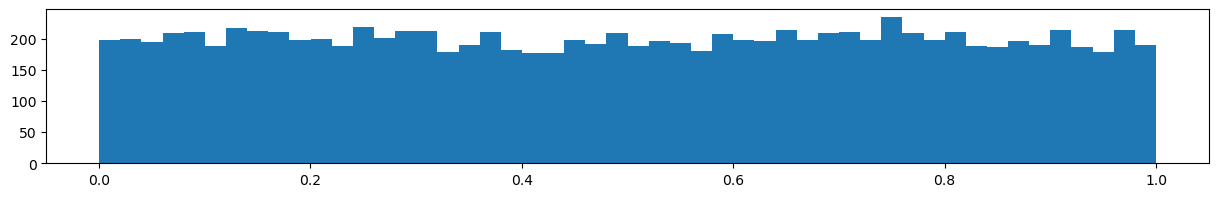

In [113]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15,2))    # 그래프 크기 figsize(가로, 세로)
plt.hist(x, bins=50)
plt.show()

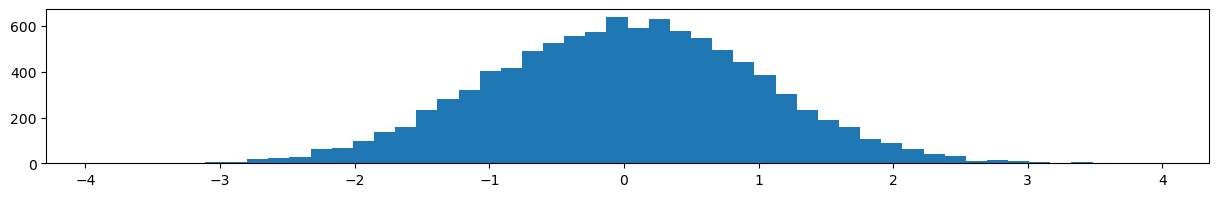

In [114]:
x = np.random.randn(10000)
x = np.random.randn(10000)
plt.figure(figsize=(15,2))    # 그래프 크기 figsize(가로, 세로)
plt.hist(x, bins=50)
plt.show()

In [116]:
# 2차원 난수 배열
np.random.seed(12) # seed값을 맞추면 발생되는 난수 순서가 동일
np.random.random((2,5)) # 0부터 1미만 균등분포 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [117]:
np.random.uniform(-1,10, (2,5)) #-1 ~ 10 미만의 균등분포 난수 배열


array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [118]:
np.random.normal(10, 2, (2, 5)) # 평균10, 표준편차 2인 정규분포 난수 배열

array([[12.19191224,  7.5696624 , 12.68471274,  9.75570042, 12.02503095],
       [ 8.17226171,  7.94093959, 12.4195929 , 11.00374461, 10.27769235]])

## 2.4 연속된 값을 갖는 배열 만들기
- np.arange(from, stop, by, dtype) : from 부터 stop앞까지 by 씩 증감하는 정수 배열
- np.linspace(from, to ,count) : from부터, to 까지 count개 숫자를 1차원 배열

In [119]:
np.linspace(0, 2, 20)

array([0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
       0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842,
       1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
       1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ])

In [127]:
# linspace : 많은 수의 점들을 생성
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

<function matplotlib.pyplot.show(close=None, block=None)>

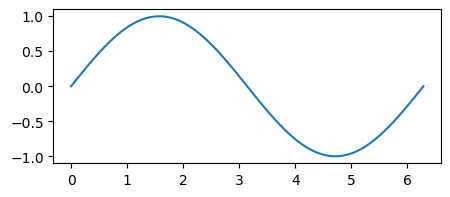

In [128]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2))
plt.plot(x, y)
plt.show

In [129]:
np.linspace(0, 2, 20).reshape(2, 10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [130]:
np.arange(10, 30, 3, dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기
- reshape([면수], 행수, 열수) : -1이 올 수도
- resize([면수], 행수, 열수) : -1 불가
- T : 전치행렬로 변환
- transpose() : 전치행렬로 변환
※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열 수정됨

In [7]:
a = np.random.random((2,3))
a

array([[0.16399394, 0.22294201, 0.34332718],
       [0.50597389, 0.66425996, 0.36723876]])

In [8]:
a *10

array([[1.63993939, 2.22942009, 3.43327181],
       [5.05973895, 6.64259963, 3.67238757]])

In [9]:
a = np.round(a*10) # round : 반오림 / floor : 내림 / ceil : 올림
a

array([[2., 2., 3.],
       [5., 7., 4.]])

In [10]:
a = a.reshape(3,2)
a

array([[2., 2.],
       [3., 5.],
       [7., 4.]])

In [11]:
a.reshape(2, -1) # -1이 주어지면 해당 차원의 크기가 자동 계산  자동으로 계산 되어서 2를 행으로 넣어서 3이 열로 나오게 된다

array([[2., 2., 3.],
       [5., 7., 4.]])

In [12]:
a = a.reshape(-1, 1)  # 행에 넣어도 열이 자동으로 계산이 된다. 
a

array([[2.],
       [2.],
       [3.],
       [5.],
       [7.],
       [4.]])

In [13]:
a.resize((2,3)) # 결과를 출력하지 않는 함수는 배열을 바꿈 여기에서는 -1을 사용할수 없다. 

In [14]:
a

array([[2., 2., 3.],
       [5., 7., 4.]])

In [15]:
import seaborn as sns
sns.load_dataset('iris')[::25]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
25,5.0,3.0,1.6,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica
125,7.2,3.2,6.0,1.8,virginica


In [16]:
import numpy as np

In [19]:
a.ravel(), a.flatten()

(array([2., 2., 3., 5., 7., 4.]), array([2., 2., 3., 5., 7., 4.]))

In [17]:
a

array([[2., 2., 3.],
       [5., 7., 4.]])

In [20]:
a.T # 전치행렬(행과 열을 뒤바뀐 행렬)

array([[2., 5.],
       [2., 7.],
       [3., 4.]])

In [21]:
a.transpose() # 전치행렬

array([[2., 5.],
       [2., 7.],
       [3., 4.]])

## 2. 배열 인쇄

In [23]:
# 배열이 커서 출력이 안 될 경우
np.arange(1001), print(np.arange(1001))

[   0    1    2 ...  998  999 1000]


(array([   0,    1,    2, ...,  998,  999, 1000]), None)

In [27]:
np.arange(10000).reshape(100,100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [26]:
# 배열 출력 옵션 변경(인쇄할 사이즈를 10000, 최대치, 무한대)
import sys # 최대치 : sys.maxsize
np.set_printoptions(threshold=10000)

In [29]:
 # np.set_printoptions(threshold=sys.maxsize) # 최대치까지
np.set_printoptions(threshold=np.inf)   # 무한대

## 2.7 기본 연산 동작
### 1) 배열의 요소별 연산

In [38]:
a = np.array([10, 20, 30, 40], dtype=np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b, b.dtype)

[10 20 30 40] int8
[0 1 2 3] int32


In [39]:
a + b

array([10, 21, 32, 43])

In [44]:
c = a + b
c, c.dtype

(array([10, 22, 34, 46]), dtype('int32'))

In [45]:
a += b # a = a+b
a

array([10, 22, 34, 46], dtype=int8)

In [47]:
a = a+b
a, a.dtype

(array([10, 24, 38, 52]), dtype('int32'))

In [50]:
a = np.array([10, 20, 30, 40], dtype=np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b, b.dtype)
a**b # ** 승 연산자 a 의 b 승

[10 20 30 40] int8
[0 1 2 3] int32


array([    1,    20,   900, 64000], dtype=int32)

In [56]:
a < 30 # 요소별로 계산을 해준다

array([ True,  True, False, False])

In [60]:
print(a[[ True,  True, False, False]])
print(a[a<30])

[10 20]
[10 20]


In [61]:
print(a)
print(b)
a * b

[10 20 30 40]
[0 1 2 3]


array([  0,  20,  60, 120])

### 2) 행렬(2차원 배열)의 곱(@, dot 함수) 
cf*(요소별 곱)

In [62]:
a = np.array([[1,2],
             [0,1]])
b = np.array([[2,0],
            [3,4]])
a,b

(array([[1, 2],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [63]:
a* b

array([[2, 0],
       [0, 4]])

In [64]:
a @ b   # 행렬의 곱

array([[8, 8],
       [3, 4]])

In [67]:
print('행렬의 곱 a.dot(b)', a.dot(b), sep='\n')

행렬의 곱 a.dot(b)
[[8 8]
 [3 4]]


In [68]:
# 2행 2열의 단위행렬 : np.eye(n) : A@ 단위행렬 = A
np.eye(2)

array([[1., 0.],
       [0., 1.]])

## 3) 복합 대입연산자 사용
- 배열에서는 a = a+b 와 a +=b 다소 다르게 작동

In [70]:
a = np.ones((2,3), dtype = int)  # 2행3열 int32배열
a

array([[1, 1, 1],
       [1, 1, 1]])

In [71]:
b = np.random.random((2, 3)) # 2행 3열 float64 배열
b

array([[0.92943728, 0.0643444 , 0.16219515],
       [0.32170535, 0.96637006, 0.27093256]])

In [74]:
b +=a
b

array([[2.92943728, 2.0643444 , 2.16219515],
       [2.32170535, 2.96637006, 2.27093256]])

In [75]:
a +=b # 이거는 오류를 발생시킨다

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [76]:
a = a+b # a +b를 새로운 변수 a 할당
a

array([[3.92943728, 3.0643444 , 3.16219515],
       [3.32170535, 3.96637006, 3.27093256]])

### 4) 배열 요소별 집계
- sum, min, max, mean, var(분산), std(표준편차)

In [79]:
a = np.array([[2,2,2,3],
            [4,3,2,1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [82]:
print(np.sum(a), a.sum())
print(np.min(a), a.min())
print(np.max(a), a.max())
print(np.mean(a), a.mean())
print(np.var(a), a.var())
print(np.std(a), a.std())

19 19
1 1
4 4
2.375 2.375
0.734375 0.734375
0.8569568250501305 0.8569568250501305


### 4) 배열 축별 집계
- sum, min, max, mean, var(분산), std(표준편차), argmax(최대값의 인덱스)

In [92]:
# axis=1 : 0축을 고정으로 1축(열)들의 함
print(a)
print('------')
print(a.sum(axis=1), np.sum(a, axis=1))

[[2 2 2 3]
 [4 3 2 1]]
------
[ 9 10] [ 9 10]


In [93]:
# axis = 0: 1축을 고정으로  0축(행)들의 합
print(a.sum(axis=0), np.sum(a,axis=0))

[6 5 4 4] [6 5 4 4]


In [97]:
print('a의 행별 최대값 위치 :', a.argmax(axis=1), np.argmax(a, axis=1))

a의 행별 최대값 위치 : [3 0] [3 0]


In [98]:
# 3차원 배열의 축별 집계
b = np.arange(24).reshape(2,3,4) #2면 3행 4열
b, b.ndim

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 3)

In [101]:
# axis=0 : 1축과 2축은 고정하고 0축(0행, 1면)들의 합
b.sum(axis=0), np.sum(b, axis=0)

(array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]),
 array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]))

In [102]:
# axis = 1 : 0축과 2축은 고정하고 1축(0행, 1행, 2행)들의 합
b.sum(axis=1)

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [103]:
# acix = 2 : 
b.sum(axis=2)

array([[ 6, 22, 38],
       [54, 70, 86]])

## 2.8 그외 요소별 계산하는 범용함수들
- 메모리나 시간을 효율적으로 사용할 수 있음
- np.add(A, B,C) : C = np.add(A, B); C=A+B
- np.substract(A, B,C) : C = np.substract(A, B); C=A-B
- np.multiply(A, B,C) : C = np.multiply(A, B); C=A*B
- np.squt(배열) : 요서별 제곱근 cf. math.sqrt(스칼라값)

In [105]:
a = np.array([1,2])
b = np.array([3,4])
c = a+b
c

array([4, 6])

In [106]:
np.add(a, b, c)
c

array([4, 6])

In [107]:
# np.sqrt(배열 또는 스칼라값) math.sqrt(스칼라)
a, np.sqrt(a), np.sqrt(4)

(array([1, 2]), array([1.        , 1.41421356]), 2.0)

In [109]:
import math
math.sqrt(4)
math.sqrt(a)

TypeError: only size-1 arrays can be converted to Python scalars

## 2.9 브로드 케이스팅
- 서로 다른 키기의 배열간 연산을 수행할 수 있도록 해주는 강력한 기능

In [124]:
# 1차원 배열의 브로드케스팅
a = np.array([1,2,3])
b = np.array([10])
b = 10
print(a+b)
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [125]:
# 2차원 배렬의 브로드케스팅
a = np.array([[0,0,0],
            [10,10,10],
            [20,20,20],
            [30,30,30]])  # 4행 3열
b = np.array([1,2,3]) # 3열
a+b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [126]:
a = np.array([[0,0,0],
            [10,10,10],
            [20,20,20],
            [30,30,30]])  # 4행 3열
b = np.array([[1],
             [2],
             [3],
             [4]]) # 4행 1열
a+b

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [127]:
b = np.array([1,2,3, 4]) # 4열 -> (축증가) -> 4행1열
b_1 = b.reshape(4, 1)    # 가장 쉬운 방법 1
b_1

array([[1],
       [2],
       [3],
       [4]])

In [128]:
b = np.array([1,2,3, 4])
b_1 = b[:, np.newaxis]   # 방법 2   이걸 많이 사용
b_1

array([[1],
       [2],
       [3],
       [4]])

In [129]:
b_1 = np.expand_dims(b, axis=1) #방법 3
b_1

array([[1],
       [2],
       [3],
       [4]])

In [130]:
a + b[:, np.newaxis]

array([[ 1,  1,  1],
       [12, 12, 12],
       [23, 23, 23],
       [34, 34, 34]])

In [131]:
# a 와 b 의 모든쌍의 조합에 대해 계산하고 싶을 떄 
a = np.array([2,3,4,5])
b = np.array([10,20,30,40])
a + b[:, np.newaxis]

array([[12, 13, 14, 15],
       [22, 23, 24, 25],
       [32, 33, 34, 35],
       [42, 43, 44, 45]])

In [138]:
a[:, np.newaxis] + b

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

In [140]:
np.ix_(a, b)

(array([[2],
        [3],
        [4],
        [5]]),
 array([[10, 20, 30, 40]]))

In [142]:
ax, bx = np.ix_(a, b)
ax + bx

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

# 3절. 배열 합치기/분리하기
- 슬라이싱
- 두배열을 합치는 함수 / 두배열을 분리하는 함수
- r_, c_
- 두배열을 분리하는 함수
## 3.1 인덱싱과 슬라이싱
- 인덱싱에는 없는 인덱스 사용시 에러
- 슬라이싱에는 없는 인덱스 사용시 끝까지
- 음수 인덱스는 끝에서부터

In [143]:
a = np.arange(10)*3
a

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [145]:
a = np.arange(20).reshape(5,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [146]:
a[1:3, 1:3]

array([[ 5,  6],
       [ 9, 10]])

In [149]:
# 모든 행의 마지막 열 앞까지 (모든 행 = 모든 0축의 경우 : 나 ...을 반드시 명시)
a[:, 0:-1], a[..., :-1]

(array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]),
 array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]))

In [150]:
# 0~1행까지 모든열 추출(모든 열(1축) 의 경우 생략 가능:, ...사용가능)
a[0:2, :], a[:2, ...], a[:2]

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]))

In [168]:
# 마지막행의 데이터를 2차원으로 변경 -> 4행 1열로 바꾸기
a_1 = a[-1]    # a[-1:] 이거는 다른거다
a_1

array([16, 17, 18, 19])

In [169]:
a_2 = np.expand_dims(a_1, axis=1) 
a_2

array([[16],
       [17],
       [18],
       [19]])

In [170]:
a[-1][:, np.newaxis],   a[-1].reshape(4, -1), np.expand_dims(a[-1], axis=1)

(array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]))

## 3.2 두 배열을 합치는 함수
**- vstack(tup) : 아래로 추가하는 방식**<br>
**- hstack(tup) : 옆으로 추가하는 방식**<br>
**- dstack(tup) : 마지막 축(열)을 쌇아 합침(차원증가)**<br>

In [177]:
a = np.array([1,2,3])
b = np.array([4,5,6])
v = np.vstack((a,b))
print('vstack', v, v.shape, sep='\n')
h = np.hstack((a,b))
print('hstack', h, h.shape, sep='\n')
d = np.dstack((a,b))
print('dstack', d, d.shape, sep='\n')

vstack
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack
[1 2 3 4 5 6]
(6,)
dstack
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [182]:
c = np.arange(24).reshape(2,3,4)
a, b = c[0], c[1]
a, b


(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [183]:
v = np.vstack((a,b))
print('vstack', v, v.shape, sep='\n')
h = np.hstack((a,b))
print('hstack', h, h.shape, sep='\n')
d = np.dstack((a,b))
print('dstack', d, d.shape, sep='\n')

vstack
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
(6, 4)
hstack
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
(3, 8)
dstack
[[[ 0 12]
  [ 1 13]
  [ 2 14]
  [ 3 15]]

 [[ 4 16]
  [ 5 17]
  [ 6 18]
  [ 7 19]]

 [[ 8 20]
  [ 9 21]
  [10 22]
  [11 23]]]
(3, 4, 2)


In [185]:
np.concatenate((a,b), axis=0) # vstack((a,b))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [186]:
np.concatenate((a,b), axis =1) # hstack((a,b))

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

- **column_stack(tup) : 열단위로 합침**
- **row_stack(tup) : 행단위로 합침 == vstack(tup) **
- **stack(tup, axis=0) : axis속성에 따라서 배열합침 axis 음수차원 가능**

In [187]:
a = np.array([1,2,3])
b = np.array([4,5,6])
c = np.array([7,8,9])
np.column_stack((a,b,c))

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [188]:
np.row_stack((a,b,c))

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [189]:
c = np.arange(24).reshape(2,3,4)
a, b = c[0], c[1]
a, b


(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [190]:
np.stack((a,b), axis=0) # 0 면 a, 1면 b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [191]:
np.stack((a,b), axis=1) # 행(1축 끼리 합쳐서 면을 이룸)

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [194]:
np.stack((a,b), axis=2) #or -1 # a의 행과 b의 행을 열로 합쳐서 면을 이룸

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3r_, c_

In [195]:
a = np.array([1,2,3,4])
b = np.array([5,5,5,5])
c = np.array([6,6,6,6])
np.r_[a, b, c] # 행 합치기

array([1, 2, 3, 4, 5, 5, 5, 5, 6, 6, 6, 6])

In [196]:
np.r_[[a], [b], [c]] # v

array([[1, 2, 3, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6]])

In [198]:
np.c_[a,b,c] # 컬럼 쌓기

array([[1, 5, 6],
       [2, 5, 6],
       [3, 5, 6],
       [4, 5, 6]])

## 3.4 배열 분리하는 함수
- **vssplit(ary, 정수나 벡터) : 첫번째 축을 따라 분할 **
- **hsplit(ary, 정수나 벡터) : 두번째 축을 따라 분할 **
- **dsplit(art, 정수나 벡터) : depth따라 나눔(3차원 이상에서만 동작)**
       - 정수 n : n개 분리
       - [n] : n번째 인덱스를 기점으로 분리
       - [m, n] : m번째, n번째 인덱스를 기점으로 분리

In [199]:
a = np.arange(12). reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [202]:
a_vsplit = np.vsplit(a, 3) # 2개 분리는 에러
a_vsplit

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [203]:
np.vsplit(a, [2]) # 2번 인덱스를 기점으로 분리

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]])]

In [204]:
np.hsplit(a, 2) # 3로 나눌때 에러

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [205]:
np.hsplit(a, [2,3])  [2,3] : 분리될 기준 인덱스

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2],
        [ 6],
        [10]]),
 array([[ 3],
        [ 7],
        [11]])]

- **split(ary, 갯수나 인덱스벡터, axis)**
     - axis=0 : vsplit() 동일
     - axis=1 : hsplit() 동일
     - axis=2 : 3차원 이상에서만 동작 dsplit() 동일
- **array_split(ary, 갯수나 인덱스벡터, axis)**
     - split과의 차이점은 나눠지지 않는 정수로도 사용 가능

In [206]:
a = np.arange(20).reshape(2, 10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [207]:
np.split(a, 2, axis=0) # 행분리

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [208]:
np.split(a, 2, axis=1) # 열분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [210]:
#np.split(a, 3, axis=1) # 열분리 에러 나눌수가 없음
np.array_split(a, 3, axis=1)

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]

# 4절. 복사와 뷰
## 4.1 할당

In [212]:
import numpy as np
a = np.arange(6)
a

array([0, 1, 2, 3, 4, 5])

In [213]:
b = a

In [214]:
# a 와 b 가 같은 객체냐?
a is b

True

In [215]:
b.shape = (2,3)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [216]:
a

array([[0, 1, 2],
       [3, 4, 5]])

## 4.2 뷰(view)
- 슬라이싱할 경우 자동 view 생성


In [236]:
c = np.arange(12).reshape(2,-1)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [237]:
d = c.view() # c의 뷰 : 얕은 복사
d is c # c객체와 d 객체가 같냐?

False

In [238]:
id(c), id(d)

(3104682680144, 3104682681776)

In [239]:
np.all(c == d)

True

In [240]:
d.shape = (3,4)
d

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [241]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [242]:
d[0,::2] 

array([0, 2])

In [243]:
d[0,::2]=-99
d

array([[-99,   1, -99,   3],
       [  4,   5,   6,   7],
       [  8,   9,  10,  11]])

In [244]:
c

array([[-99,   1, -99,   3,   4,   5],
       [  6,   7,   8,   9,  10,  11]])

In [253]:
# 슬라이싱이 될떄 자동 뷰가 반환됨
c = np.arange(12).reshape(2,6)
c


array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [254]:
d = c[:,:-1]
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [255]:
d[-1, -1] = 99
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 99]])

In [256]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 99, 11]])

## 4.3 깊은 복사

In [258]:
c = np.arange(12).reshape(2,6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [259]:
d=c[:,:-1].copy()  # 깊은 복사
d

array([[ 0,  1,  2,  3,  4],
       [ 6,  7,  8,  9, 10]])

In [261]:
d[...,-1]=99
d

array([[ 0,  1,  2,  3, 99],
       [ 6,  7,  8,  9, 99]])

In [262]:
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

# 5.절 고급인덱싱
## 5.1 인덱스 배열로 인덱싱

In [263]:
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [264]:
a[[0,0,1,5]]

array([ 0,  0,  1, 25])

In [270]:
# 인덱싱하기 위한 값을 배열로 만듦
i = np.array([0,0,1,5])
a[i]

array([ 0,  0,  1, 25])

In [278]:
# 인덱싱하기 위한 값을 배열로 만듬
j = np.array([[0,0],
             [1,5]])
a[j]

array([[ 0,  0],
       [ 1, 25]])

In [275]:
                    # R G B
palette = np.array([[0,0,0],      #black
                   [255,0,0],     #red
                   [0,255,0],     #green
                   [0,0,255],     #blue
                   [255,255,255]])#white

In [279]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_index.shape

(10, 10)

In [281]:
image_data = palette[image_index]

In [283]:
image_data.shape

(10, 10, 3)

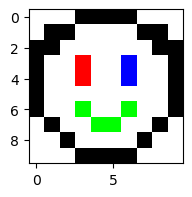

In [284]:
from matplotlib import pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.show()

## 5.2 논리 배열을 이용한 인덱싱

In [288]:
a = np.array([0,1,10,11,12,13,14,15,99])
a

array([ 0,  1, 10, 11, 12, 13, 14, 15, 99])

In [289]:
a%2==0

array([ True, False,  True, False,  True, False,  True, False, False])

In [291]:
a[a%2==0] # 논리 배열을 이용한 인덱싱 시 True 요소만 추출

array([ 0, 10, 12, 14])

In [ ]:
# a에서 12보다 큰 값만 추출

In [292]:
a[a>12]

array([13, 14, 15, 99])

# 6절. 선형대수
- 2차원 넘퍼이배열을 행렬
     * 행렬 곱 : @, dot(), 단위행렬
     * 역행렬 : np.linalg.inv(행렬) : 역행렬@행렬 = 단위행렬
     * 전치행렬 : 행렬.T / 행렬.transpose

In [295]:
a = np.array([[1,2],
             [3,4]])
# 정방행렬
a


array([[1, 2],
       [3, 4]])

In [298]:
#a 의 역행렬 : a 의 역행렬 @ a = a@a의 역행렬 => 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [299]:
np.linalg.inv(a)@a  # 단위행렬

array([[1.0000000e+00, 4.4408921e-16],
       [0.0000000e+00, 1.0000000e+00]])

## 6.1 선형 연립 방정식 풀기


In [18]:
x = np.array([2, 4]) # 독립변수
Y = np.array([40,60]) # 종속변수
X = np.dstack( (x, np.ones(len(x))))
X

array([[[2., 1.],
        [4., 1.]]])

In [19]:
# X @ wb = Y
# X의 역행렬 @ X @ wb = X의 역행렬 @ Y
# wb = X의 역행렬 @ Y
wb = np.linalg.inv(X) @ Y
wb

array([[10., 20.]])

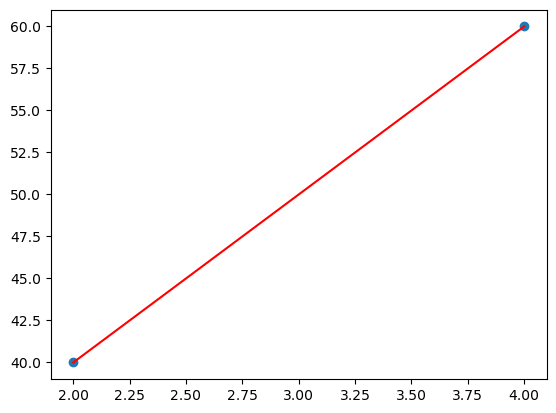

In [20]:
import matplotlib.pyplot as plt
plt.scatter(x, Y)
plt.plot(x, 10*x+20, 'r')

## 6.2 선형연립방정식 풀이 : 독립변수 1개, 데이터 n개

In [21]:
x = np.array([32,64,96,118])
X = np.c_[x, np.ones(len(x))]
X # 정방행렬이 아님

array([[ 32.,   1.],
       [ 64.,   1.],
       [ 96.,   1.],
       [118.,   1.]])

In [23]:
#  np.linalg.inv(X)   X 가 정방행렬이 아니면 역행렬을 구할 수 없음

In [24]:
X.T # 전치행렬

array([[ 32.,  64.,  96., 118.],
       [  1.,   1.,   1.,   1.]])

In [25]:
X_ = X.T@X
X_

array([[2.826e+04, 3.100e+02],
       [3.100e+02, 4.000e+00]])

In [27]:
# X 가 정방행렬이 아닐 경우, X.T @ X 로 벙방행렬을 만든 후 역행렬을 곱
np.linalg.inv(X_) @ X_

array([[1., 0.],
       [0., 1.]])

In [30]:
x = np.array([32,64,96,118, 126,144,152.5,158])
y = np.array([18,24,61.5,49,52,105,130.3,125])

In [32]:
X = np.c_[x, np.ones(len(x))]
X

array([[ 32. ,   1. ],
       [ 64. ,   1. ],
       [ 96. ,   1. ],
       [118. ,   1. ],
       [126. ,   1. ],
       [144. ,   1. ],
       [152.5,   1. ],
       [158. ,   1. ]])

In [33]:
Y = y.reshape(-1, 1)
Y

array([[ 18. ],
       [ 24. ],
       [ 61.5],
       [ 49. ],
       [ 52. ],
       [105. ],
       [130.3],
       [125. ]])

In [34]:
X, Y

(array([[ 32. ,   1. ],
        [ 64. ,   1. ],
        [ 96. ,   1. ],
        [118. ,   1. ],
        [126. ,   1. ],
        [144. ,   1. ],
        [152.5,   1. ],
        [158. ,   1. ]]),
 array([[ 18. ],
        [ 24. ],
        [ 61.5],
        [ 49. ],
        [ 52. ],
        [105. ],
        [130.3],
        [125. ]]))

In [37]:
# X@wb = Y
# X.T @ X @ wb = X.T @ Y
# (X.T @ X)의 역행렬 @ X.T @ wb = (X.T @ X)의 역행렬 @ X.T @ Y 
# X의 역행렬 @ X @ wb = X의 역행렬 @Y
wb = np.linalg.inv(X.T @ X) @ X.T @ Y
wb

array([[  0.87493126],
       [-26.79078617]])

In [41]:
wb[0,0], wb[1,0] # 기울기와 Y 절편
y_hat = wb[0,0] * x + wb[1,0] # 예측값
print('독립변수', x)
print('종속변수', y)
print('예측값', y_hat)

독립변수 [ 32.   64.   96.  118.  126.  144.  152.5 158. ]
종속변수 [ 18.   24.   61.5  49.   52.  105.  130.3 125. ]
예측값 [  1.20701424  29.20481464  57.20261504  76.45110282  83.45055292
  99.19931565 106.63623138 111.44835332]


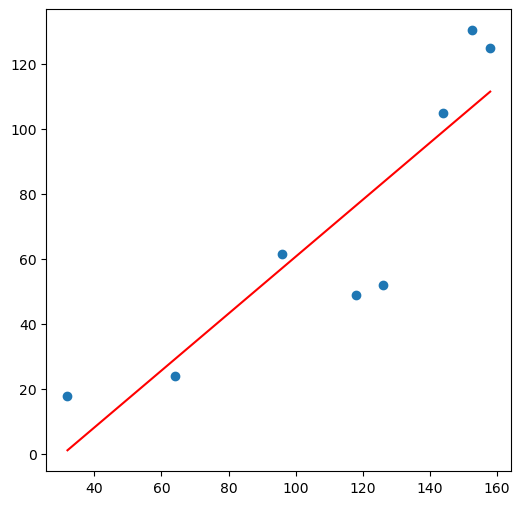

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.scatter(x,y)
plt.plot(x, y_hat, 'r')
plt.show()

# 7절. 연습문제

In [46]:
# 1번
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [48]:
iris_data = iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
#1. 열별 평균

In [83]:
print(iris_data.mean(axis=0))
np.mean(iris_data, axis=0)

[5.84333333 3.05733333 3.758      1.19933333]


array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [52]:
#2. 
iris_data[0:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [53]:
#3.
iris_data[0:5, :-1]

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4]])

In [62]:
#4. 
iris_data1 = iris_data[:,-1][:5] 
iris_data1

array([0.2, 0.2, 0.2, 0.2, 0.2])

In [86]:
iris_data1[:, np.newaxis]

array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [88]:
#5.
a = iris_data[0:5, :-1] 
b = iris_data1[:, np.newaxis] 
np.hstack((a, b))


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [70]:
#6.
iris_data[0:5, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [71]:
iris_data.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [73]:
print((iris_data[0:5, :])>(iris_data.mean(axis=0)))

[[False  True False False]
 [False False False False]
 [False  True False False]
 [False  True False False]
 [False  True False False]]


In [91]:
data_mean = iris_data.mean(axis=0)
result = np.where(iris_data[0:5, :] > data_mean, iris_data[0:5, :], 0)
print(result)

[[0.  3.5 0.  0. ]
 [0.  0.  0.  0. ]
 [0.  3.2 0.  0. ]
 [0.  3.1 0.  0. ]
 [0.  3.6 0.  0. ]]


In [75]:
data_mean = iris_data.mean(axis=0)

In [77]:
print(iris_data[0:5, :]>(data_mean))

[[False  True False False]
 [False False False False]
 [False  True False False]
 [False  True False False]
 [False  True False False]]


In [89]:
sample = iris_data[:5]
sample[sample > np.mean(sample, axis=0)]
sample

array([5.1, 3.5, 4.9, 1.5, 5. , 3.6])

In [92]:
x = sample.copy()
x[x<=np.mean(x, axis=0)] = None
x, sample

(array([[5.1, 3.5, nan, nan],
        [4.9, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, 1.5, nan],
        [5. , 3.6, nan, nan]]),
 array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]))

In [78]:
# 1 : 3
# 2 : 3
# 3 : 1,
# 4 : 2
# 5 : 2